# Differential expression

One of the main applications of metabolic RNA labeling is to identify differentially expressed genes upon some perturbation [[1]](https://www.nature.com/articles/s41586-019-1369-y). The main benefit of using metabolic RNA labeling is that short-term changes can be resolved much better as compared to standard RNA-seq, since any changes of transcription that indeed happened are masked to some extent by pre-existing RNA.

To perform differential analyses for data from [[2]](https://www.nature.com/articles/s41586-021-03689-8). These are SLAM-seq data from multiple time points (1h, 2h, 4h, 6h and 20h) after acute depletion of BANP. BANP is a transcriptional activator that binds to unmethylated CGCG motifs in CpG island promoters.

# Loading data and QC
We first load the grandPy package and then read the GRAND-SLAM output table directly from zenodo:

In [1]:
import warnings
import pandas as pd
import grandpy as gp

warnings.filterwarnings("ignore", category=UserWarning)

banp = gp.read_grand("https://zenodo.org/record/6976391/files/BANP.tsv.gz", design=("Cell", "Experimental.time", "Genotype", "dur.4sU", "has.4sU", "Replicate"))

Detected URL -> downloading to temp file
Detected dense format -> using dense reader
Temporary file BANP.tsv.gz was deleted after loading.


Refer to the [Loading data and working with grandPy objects](vignette_03_loading_data_and_working_with_grandPy_objects.ipynb) vignette to learn more about how to load data. Note that sample metadata has been automatically extracted from the sample names via the design parameter given to `read_grand`:

In [2]:
banp.coldata

,Name,Cell,Experimental.time,Experimental.time.original,Genotype,duration.4sU,duration.4sU.original,has.4sU,Replicate,no4sU,Condition
Name,,,,,,,,,,,
mESC.0h.wt.0h.no4sU.A,mESC.0h.wt.0h.no4sU.A,mESC,0.0,0h,wt,0.0,0h,no4sU,A,True,Control
mESC.0h.wt.0h.no4sU.B,mESC.0h.wt.0h.no4sU.B,mESC,0.0,0h,wt,0.0,0h,no4sU,B,True,Control
mESC.0h.wt.0h.no4sU.C,mESC.0h.wt.0h.no4sU.C,mESC,0.0,0h,wt,0.0,0h,no4sU,C,True,Control
mESC.0h.wt.2h.4sU.A,mESC.0h.wt.2h.4sU.A,mESC,0.0,0h,wt,2.0,2h,4sU,A,False,Control
mESC.0h.wt.2h.4sU.B,mESC.0h.wt.2h.4sU.B,mESC,0.0,0h,wt,2.0,2h,4sU,B,False,Control
mESC.0h.wt.2h.4sU.C,mESC.0h.wt.2h.4sU.C,mESC,0.0,0h,wt,2.0,2h,4sU,C,False,Control
mESC.0h.dTag.2h.4sU.A,mESC.0h.dTag.2h.4sU.A,mESC,0.0,0h,dTag,2.0,2h,4sU,A,False,Control
mESC.0h.dTag.2h.4sU.B,mESC.0h.dTag.2h.4sU.B,mESC,0.0,0h,dTag,2.0,2h,4sU,B,False,Control
mESC.1h.dTag.30min.4sU.A,mESC.1h.dTag.30min.4sU.A,mESC,1.0,1h,dTag,0.5,30min,4sU,A,False,Control


The experimental time column indicates the period of time the sample was treated with the dTAG13 compound that induces acute depletion of BANP within 30 minutes.

By default GRAND-SLAM will report data on all genes (with at least one mapped read), and `read_grand` will read all these genes from the output:

In [3]:
print(banp)

GrandPy:
Read from BANP.tsv
24616 genes, 23 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count']
Available analyses: []
Available plots: {}
Default data slot: count



Thus, we filter to only include genes that have at least 100 reads in at least 11 samples:

In [4]:
banp = banp.filter_genes(min_expression=100, min_columns=11)
print(banp)

GrandPy:
Read from BANP.tsv
11147 genes, 23 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count']
Available analyses: []
Available plots: {}
Default data slot: count



The actual data is available in so-called "data slots". `read_grand` adds the read counts, new to toal RNA ratios (NTRs) and information on the NTR posterior distribution (alpha, beta).

As a quick quality check, we can inspect a principal component analysis of all samples involved:

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.



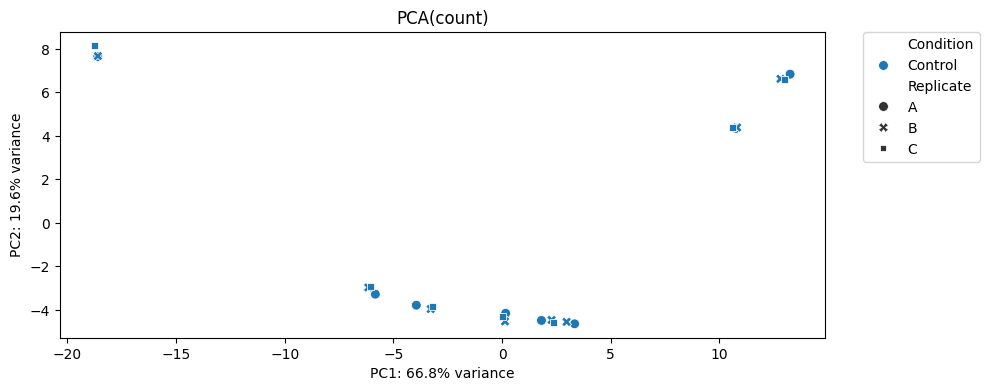

In [5]:
gp.plot_pca(banp)

By default, the samples are colored according to the `condition annotation`. `Condition` has a special meaning in grandPy, not only for `PlotPCA`, but also for other analyses (see below). We do not have a condition set (see the Coldata table above, there is no column named `Condition`). There are two ways how the condition can be set:

1. Use the keyword "Condition" in the design parameter to `read_grand`. Use this, if you have a useful condition as part of your sample names.
2. Call the `Condition` function.

Here a useful condition is to combine the genotype, timepoint and 4sU status. We can set this like this (for more information, see the [Loading data vignette](vignette_03_loading_data_and_working_with_grandPy_objects.ipynb)):

In [6]:
banp = banp.with_condition(["Genotype", "Experimental.time.original", "has.4sU"])
banp.coldata

,Name,Cell,Experimental.time,Experimental.time.original,Genotype,duration.4sU,duration.4sU.original,has.4sU,Replicate,no4sU,Condition
Name,,,,,,,,,,,
mESC.0h.wt.0h.no4sU.A,mESC.0h.wt.0h.no4sU.A,mESC,0.0,0h,wt,0.0,0h,no4sU,A,True,wt 0h no4sU
mESC.0h.wt.0h.no4sU.B,mESC.0h.wt.0h.no4sU.B,mESC,0.0,0h,wt,0.0,0h,no4sU,B,True,wt 0h no4sU
mESC.0h.wt.0h.no4sU.C,mESC.0h.wt.0h.no4sU.C,mESC,0.0,0h,wt,0.0,0h,no4sU,C,True,wt 0h no4sU
mESC.0h.wt.2h.4sU.A,mESC.0h.wt.2h.4sU.A,mESC,0.0,0h,wt,2.0,2h,4sU,A,False,wt 0h 4sU
mESC.0h.wt.2h.4sU.B,mESC.0h.wt.2h.4sU.B,mESC,0.0,0h,wt,2.0,2h,4sU,B,False,wt 0h 4sU
mESC.0h.wt.2h.4sU.C,mESC.0h.wt.2h.4sU.C,mESC,0.0,0h,wt,2.0,2h,4sU,C,False,wt 0h 4sU
mESC.0h.dTag.2h.4sU.A,mESC.0h.dTag.2h.4sU.A,mESC,0.0,0h,dTag,2.0,2h,4sU,A,False,dTag 0h 4sU
mESC.0h.dTag.2h.4sU.B,mESC.0h.dTag.2h.4sU.B,mESC,0.0,0h,dTag,2.0,2h,4sU,B,False,dTag 0h 4sU
mESC.1h.dTag.30min.4sU.A,mESC.1h.dTag.30min.4sU.A,mESC,1.0,1h,dTag,0.5,30min,4sU,A,False,dTag 1h 4sU


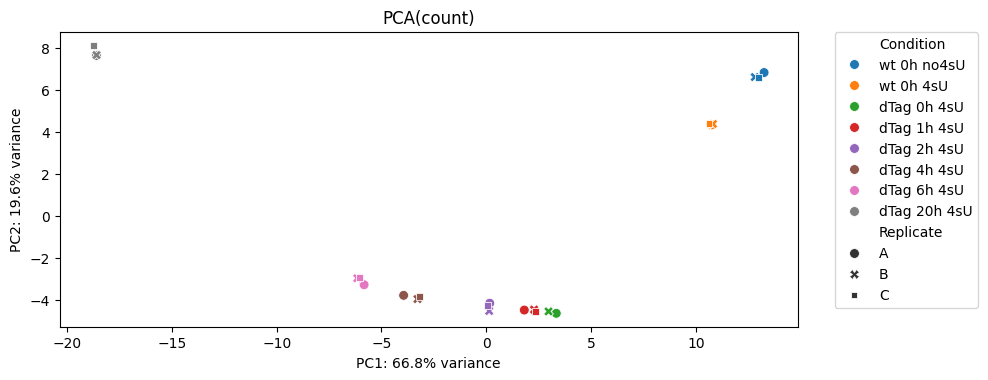

In [7]:
gp.plot_pca(banp)

We see that (i) 4sU treatment had an effect on total RNA levels (there is a clear difference between no4sU and 4sU for wt), and that (ii) inserting the degron tag also had an effect (there is a clear difference between wt) and dTag.0h, the latter is a sample treated with 4sU for 2h, but was not treated with dTAG13).

Before we can investigate these effects, we need to learn how to perform pairwise differential expression analysis in grandPy. Such pairwise analyses are based on so-calles "contrast matrices", which can conveniently be constructed by using the `get_contrasts` function:

In [8]:
banp.get_contrasts()

,wt 0h no4sU vs wt 0h 4sU,wt 0h no4sU vs dTag 0h 4sU,wt 0h no4sU vs dTag 1h 4sU,wt 0h no4sU vs dTag 2h 4sU,wt 0h no4sU vs dTag 4h 4sU,wt 0h no4sU vs dTag 6h 4sU,wt 0h no4sU vs dTag 20h 4sU,wt 0h 4sU vs dTag 0h 4sU,wt 0h 4sU vs dTag 1h 4sU,wt 0h 4sU vs dTag 2h 4sU,...,dTag 1h 4sU vs dTag 2h 4sU,dTag 1h 4sU vs dTag 4h 4sU,dTag 1h 4sU vs dTag 6h 4sU,dTag 1h 4sU vs dTag 20h 4sU,dTag 2h 4sU vs dTag 4h 4sU,dTag 2h 4sU vs dTag 6h 4sU,dTag 2h 4sU vs dTag 20h 4sU,dTag 4h 4sU vs dTag 6h 4sU,dTag 4h 4sU vs dTag 20h 4sU,dTag 6h 4sU vs dTag 20h 4sU
Name,,,,,,,,,,,,,,,,,,,,,
mESC.0h.wt.0h.no4sU.A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.A,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.B,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.C,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.A,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.B,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.1h.dTag.30min.4sU.A,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Each column of the contrast matrix defines a single pairwise comparison: Samples with 0 are left out, and samples with 1 are compared vs samples with -1 (e.g. if log2 fold change are computed, comparing A vs B means log2(A/B)).

Without specifying any parameters, GetContrasts will discard no4sU samples, and all pairwise comparisons of the remaining conditions (here there are 7 conditions having 4sU, i.e. 21 pairwise comparisons) are generated. This behavior can be changed by the contrasts parameter.

This parameter is a vector of length 1, 2 or 3. The first element always is a name of a column in the Coldata table, the second and third (if given) need to be values of this column. If only the column is given, all pairwise comparisons are generated (i.e. this is the default behavior shown above, for columns “Condition”):

In [9]:
banp.get_contrasts(contrast = "Condition")

,wt 0h no4sU vs wt 0h 4sU,wt 0h no4sU vs dTag 0h 4sU,wt 0h no4sU vs dTag 1h 4sU,wt 0h no4sU vs dTag 2h 4sU,wt 0h no4sU vs dTag 4h 4sU,wt 0h no4sU vs dTag 6h 4sU,wt 0h no4sU vs dTag 20h 4sU,wt 0h 4sU vs dTag 0h 4sU,wt 0h 4sU vs dTag 1h 4sU,wt 0h 4sU vs dTag 2h 4sU,...,dTag 1h 4sU vs dTag 2h 4sU,dTag 1h 4sU vs dTag 4h 4sU,dTag 1h 4sU vs dTag 6h 4sU,dTag 1h 4sU vs dTag 20h 4sU,dTag 2h 4sU vs dTag 4h 4sU,dTag 2h 4sU vs dTag 6h 4sU,dTag 2h 4sU vs dTag 20h 4sU,dTag 4h 4sU vs dTag 6h 4sU,dTag 4h 4sU vs dTag 20h 4sU,dTag 6h 4sU vs dTag 20h 4sU
Name,,,,,,,,,,,,,,,,,,,,,
mESC.0h.wt.0h.no4sU.A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.A,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.B,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.C,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.A,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.B,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.1h.dTag.30min.4sU.A,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


If one value is given, all pairwise comparisons with this as reference are created (i.e., if A is given, all X vs A for all other values X):

In [10]:
banp.get_contrasts(contrast = ["Condition", "dTag 0h 4sU"])

,wt 0h no4sU vs dTag 0h 4sU,wt 0h 4sU vs dTag 0h 4sU,dTag 1h 4sU vs dTag 0h 4sU,dTag 2h 4sU vs dTag 0h 4sU,dTag 4h 4sU vs dTag 0h 4sU,dTag 6h 4sU vs dTag 0h 4sU,dTag 20h 4sU vs dTag 0h 4sU
Name,,,,,,,
mESC.0h.wt.0h.no4sU.A,1.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.B,1.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.C,1.0,0.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.A,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.B,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.C,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.A,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
mESC.0h.dTag.2h.4sU.B,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
mESC.1h.dTag.30min.4sU.A,0.0,0.0,1.0,0.0,0.0,0.0,0.0


If two values are given, a single pairwise comparison is created:

In [11]:
banp.get_contrasts(contrast = ["Condition", "dTag 2h 4sU", "dTag 0h 4sU"])

,dTag 2h 4sU vs dTag 0h 4sU
Name,
mESC.0h.wt.0h.no4sU.A,0.0
mESC.0h.wt.0h.no4sU.B,0.0
mESC.0h.wt.0h.no4sU.C,0.0
mESC.0h.wt.2h.4sU.A,0.0
mESC.0h.wt.2h.4sU.B,0.0
mESC.0h.wt.2h.4sU.C,0.0
mESC.0h.dTag.2h.4sU.A,-1.0
mESC.0h.dTag.2h.4sU.B,-1.0
mESC.1h.dTag.30min.4sU.A,0.0


It is possible to restrict the samples to be used by defining the columns parameter (samples for bulk experiments or cells for single cell experiments are jointly called “columns” in grandPy):

In [12]:
banp.get_contrasts(contrast = ["Condition", "dTag 0h 4sU"], columns = banp.coldata["Genotype"] == "dTag")

,dTag 1h 4sU vs dTag 0h 4sU,dTag 2h 4sU vs dTag 0h 4sU,dTag 4h 4sU vs dTag 0h 4sU,dTag 6h 4sU vs dTag 0h 4sU,dTag 20h 4sU vs dTag 0h 4sU
Name,,,,,
mESC.0h.wt.0h.no4sU.A,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.B,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.0h.no4sU.C,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.A,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.B,0.0,0.0,0.0,0.0,0.0
mESC.0h.wt.2h.4sU.C,0.0,0.0,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.A,-1.0,-1.0,-1.0,-1.0,-1.0
mESC.0h.dTag.2h.4sU.B,-1.0,-1.0,-1.0,-1.0,-1.0
mESC.1h.dTag.30min.4sU.A,1.0,0.0,0.0,0.0,0.0


If you want to perform comparisons involving no4sU samples (which usually are control samples only), you can do this by setting the no4sU parameter to True:

In [13]:
banp.get_contrasts(contrast = ["has.4sU", "4sU", "no4sU"], columns = banp.coldata["Genotype"] == "wt", no4su = True)

,4sU vs no4sU
Name,
mESC.0h.wt.0h.no4sU.A,-1.0
mESC.0h.wt.0h.no4sU.B,-1.0
mESC.0h.wt.0h.no4sU.C,-1.0
mESC.0h.wt.2h.4sU.A,1.0
mESC.0h.wt.2h.4sU.B,1.0
mESC.0h.wt.2h.4sU.C,1.0
mESC.0h.dTag.2h.4sU.A,0.0
mESC.0h.dTag.2h.4sU.B,0.0
mESC.1h.dTag.30min.4sU.A,0.0


Sometimes, you want to perform comparisons only among samples from specific groups of samples. This is useful e.g. if you want to compare treatment vs control under different conditions (e.g. cell types), or perform paired pairwise tests (if replicates A, B and C were paired, like in the following example):

In [14]:
banp.get_contrasts(contrast = ["has.4sU", "4sU", "no4sU"], columns = banp.coldata["Genotype"] == "wt", no4su = True, group = "Replicate")

,4sU vs no4sU.A,4sU vs no4sU.B,4sU vs no4sU.C
Name,,,
mESC.0h.wt.0h.no4sU.A,-1.0,0.0,0.0
mESC.0h.wt.0h.no4sU.B,0.0,-1.0,0.0
mESC.0h.wt.0h.no4sU.C,0.0,0.0,-1.0
mESC.0h.wt.2h.4sU.A,1.0,0.0,0.0
mESC.0h.wt.2h.4sU.B,0.0,1.0,0.0
mESC.0h.wt.2h.4sU.C,0.0,0.0,1.0
mESC.0h.dTag.2h.4sU.A,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.B,0.0,0.0,0.0
mESC.1h.dTag.30min.4sU.A,0.0,0.0,0.0


Finally, if you are not happy with the column names (which end up as the names for analysis tables), you can change this as well:

In [15]:
banp.get_contrasts(contrast = ["has.4sU", "4sU", "no4sU"], columns = banp.coldata["Genotype"] == "wt", no4su = True, group = "Replicate", name_format = "$GRP")

,A,B,C
Name,,,
mESC.0h.wt.0h.no4sU.A,-1.0,0.0,0.0
mESC.0h.wt.0h.no4sU.B,0.0,-1.0,0.0
mESC.0h.wt.0h.no4sU.C,0.0,0.0,-1.0
mESC.0h.wt.2h.4sU.A,1.0,0.0,0.0
mESC.0h.wt.2h.4sU.B,0.0,1.0,0.0
mESC.0h.wt.2h.4sU.C,0.0,0.0,1.0
mESC.0h.dTag.2h.4sU.A,0.0,0.0,0.0
mESC.0h.dTag.2h.4sU.B,0.0,0.0,0.0
mESC.1h.dTag.30min.4sU.A,0.0,0.0,0.0


# Differential analysis of 4sU treatment and dTag

Now we can investigate the two unwanted effects mentioned above using differential analysis using the lfc package [[3]](https://academic.oup.com/bioinformatics/article/34/23/4054/5040306?login=false) and DESeq2:

In [16]:
contrast_1 = banp.get_contrasts(contrast = ["has.4sU", "4sU", "no4sU"], columns = banp.coldata["Genotype"] == "wt", no4su = True, name_format = "4sU effect")
contrast_2 = banp.get_contrasts(contrast=["Genotype","dTag","wt"], columns = banp.coldata["Experimental.time"] == 0, name_format = "dTag effect")

contrasts = pd.concat([contrast_1, contrast_2], axis = 1)

banp = banp.compute_lfc(name_prefix= "QC", contrasts = contrasts, compute_m = False)
print(banp)

GrandPy:
Read from BANP.tsv
11147 genes, 23 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count']
Available analyses: ['QC_4sU effect', 'QC_dTag effect']
Available plots: {}
Default data slot: count



As you see, now we have two analyses added to our grandR object. We can use PlotScatter to directly plot them:

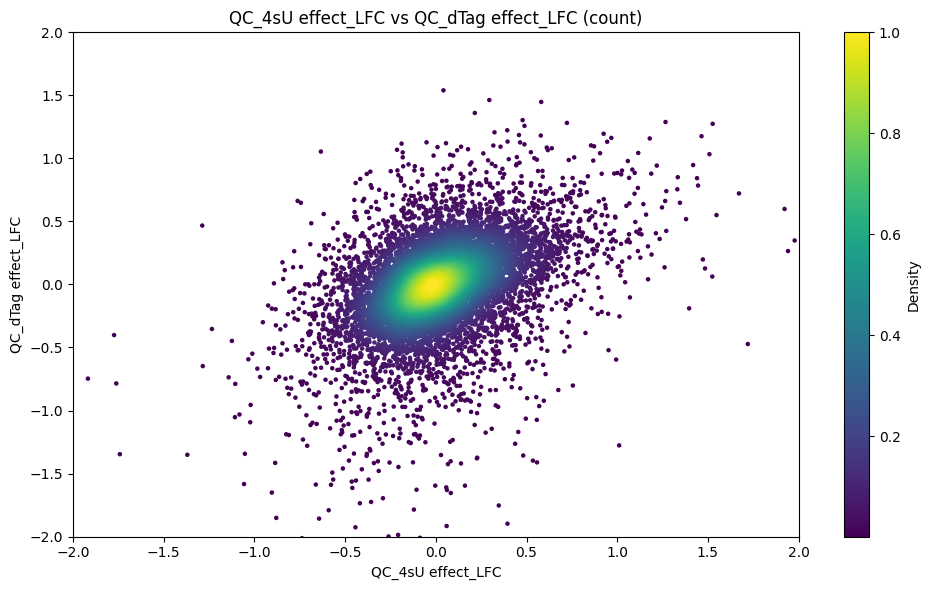

In [17]:
gp.plot_scatter(banp, x_limit = (-2.0,2.0), y_limit = (-2.0,2.0), remove_outlier = False)

This works since there are only two analysis values overall that are stored in the object (this is also why we used the compute.M = FALSE parameter above; by default, LFC() also computes the mean (M) expression value in log10 space to enable generating MA plots):